#### 栅格数据读入

In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np


In [2]:
path_data = 'data/data-base/region1_l8_20190504_wgs84.tif'

In [3]:
rsimg = rasterio.open(path_data)
img_array = rsimg.read()
img_array.shape

(6, 2155, 2636)

In [35]:
# rsimg.bounds
# region = [87.599, 88.310, 32.7099, 33.291]   ## plt.imshow()中extent: [left, right, bottom, up]

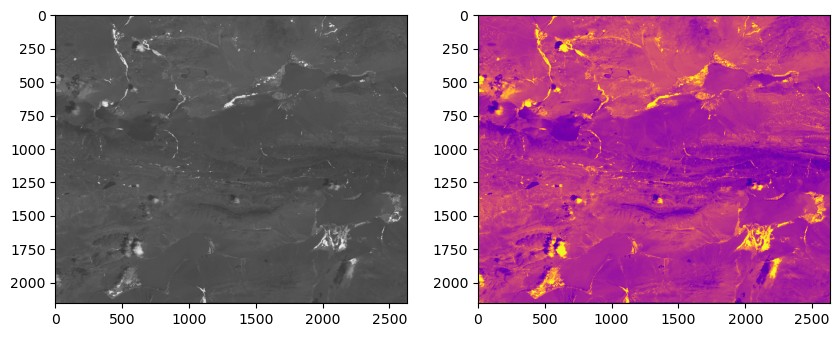

In [37]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
band1 = img_array[0]
ax[0].imshow(band1, cmap='grey')
# ax[1].imshow(band1, cmap='grey', vmax=3000, vmin=0)   ### 直方图拉伸
band1_ = band1.copy()
band1_[band1_<0]=0; band1_[band1_>3000]=3000; 
# ax[1].imshow(band1_, cmap='grey')   ### 直方图拉伸
ax[1].imshow(band1_, cmap='plasma')   ### 直方图拉伸
# ax[1].imshow(band1_, cmap='plasma', extent=region)   ### 直方图拉伸

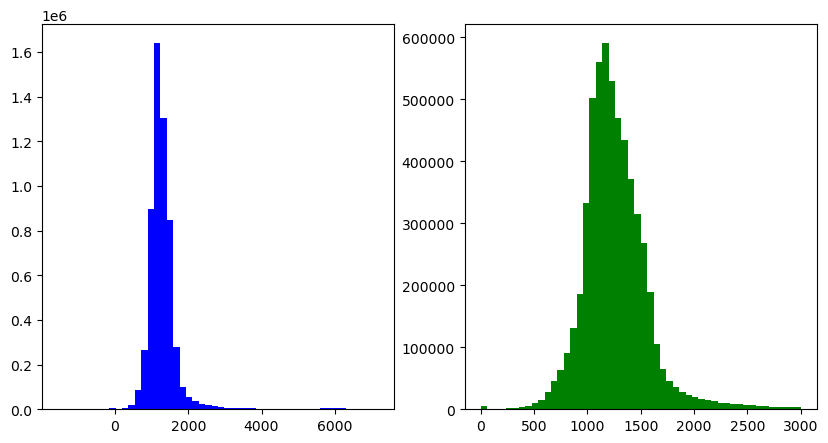

In [5]:
band1_values = img_array[0].flatten()
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist(band1_values, bins=50, facecolor='blue');
ax[1].hist(band1_values, bins=50, range=[0,3000], facecolor='green');

彩色显示

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


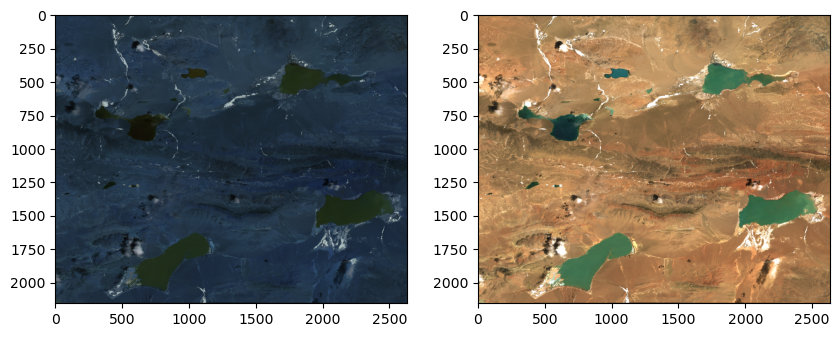

In [6]:
bands_img = img_array[0:3]
bands_img.shape
fig, ax = plt.subplots(1,2, figsize=(10,5))
bands_img = bands_img.transpose(1,2,0)
bands_img.shape
bands_img_nor = bands_img/(bands_img.max()-bands_img.min())
ax[0].imshow(bands_img_nor)
## note 1: rgb显示时，vmax, vmin失效。
# ax[1].imshow(bands_img_nor, vmax=0.5, vmin=0)   ## 根据以下直方图拉伸结果。 
bands_img_nor_ = bands_img_nor.copy()
# bands_img_nor_[bands_img_nor_<0]=0; bands_img_nor_[bands_img_nor_>0.5]=0.5;
## note 2: 显示vmin，vmax默认为0,1，且不可更改。
# ax[1].imshow(bands_img_nor_)   ## 根据以下直方图拉伸结果
bands_img_nor_ = bands_img_nor_/(0.4-0)    ## 将像元值拉伸到0-1（即归一化）
# ax[1].imshow(bands_img_nor_)   ## 根据以下直方图拉伸结果
bands_img_nor_rgb = bands_img_nor_.copy()
bands_img_nor_rgb[:,:,0], bands_img_nor_rgb[:,:,2] = \
                bands_img_nor_[:,:,2], bands_img_nor_[:,:,0]

ax[1].imshow(bands_img_nor_rgb)   ## 真彩色显示


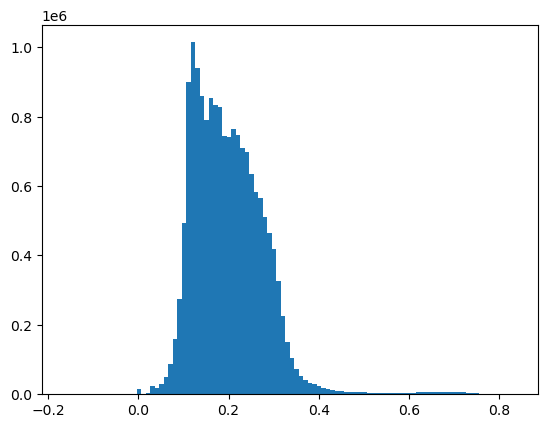

In [7]:
plt.hist(bands_img_nor.flatten(),bins=100);
